# 1. 데이터 파악 및 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/.shortcut-targets-by-id/1jnpaEOqSw5oAaH3K0Y64phHRuEhQqFZt/신용카드 연체 예측


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv("data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
df.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
df.shape

(26457, 20)

### 중복 데이터 확인


- 'begin_month' 변수를 제외한 중복 데이터 10,000개 이상  
=> 동일 인물이 다른 시기에 카드 개설했다고 가정  
=> 데이터의 절반이 중복 데이터?  
=> 한 행으로 줄이는 대신 '개설 카드 개수' 열 추가

1.credit이 같은것을 중복으로 고려해서 전처리한결과 12000개  
2.credit을 제외하고 나머지가 같을때 중복으로 고려해 전처리한 결과 8000개

In [ ]:
df.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
cols = ['gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'credit']
df[df.duplicated(cols)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
319,319,F,N,N,1,225000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-12640,-399,1,0,0,0,Accountants,3.0,-21.0,2.0
330,330,F,N,N,0,270000.0,State servant,Secondary / secondary special,Separated,House / apartment,-19363,-12332,1,0,1,1,Medicine staff,1.0,-18.0,2.0
419,419,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-18820,-3185,1,0,1,0,Low-skill Laborers,2.0,-7.0,1.0
421,421,F,Y,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-10351,-1322,1,0,0,0,NaN,2.0,-16.0,2.0
457,457,F,Y,Y,1,112500.0,Commercial associate,Higher education,Civil marriage,House / apartment,-10551,-3000,1,0,0,1,Core staff,3.0,-17.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26445,26445,F,Y,Y,0,180000.0,Commercial associate,Incomplete higher,Married,House / apartment,-13687,-4144,1,0,0,0,Laborers,2.0,-5.0,0.0
26446,26446,F,N,Y,0,135000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-16300,-9698,1,0,0,1,Managers,2.0,-41.0,2.0
26447,26447,M,N,Y,2,99000.0,Working,Secondary / secondary special,Married,House / apartment,-14226,-1026,1,1,1,0,Laborers,4.0,-43.0,2.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


In [ ]:
df['ALL'] = \
    df['child_num'].astype(str) + '_' + df['income_total'].astype(str) + '_' +\
    df['DAYS_BIRTH'].astype(str) + '_' + df['DAYS_EMPLOYED'].astype(str) + '_' +\
    df['work_phone'].astype(str) + '_' + df['phone'].astype(str) + '_' +\
    df['email'].astype(str) + '_' + df['family_size'].astype(str) + '_' +\
    df['gender'].astype(str) + '_' + df['car'].astype(str) + '_' +\
    df['reality'].astype(str) + '_' + df['income_type'].astype(str) + '_' +\
    df['edu_type'].astype(str) + '_' + df['family_type'].astype(str) + '_' +\
    df['house_type'].astype(str) + '_' + df['occyp_type'].astype(str) + '_' +\
    df['credit'].astype(str)

In [ ]:
df = df.sort_values(by='ALL')
num_card = df.groupby('ALL').size()
type(num_card)

pandas.core.series.Series

In [ ]:
df.drop_duplicates(cols, inplace=True)
df['num_card'] = num_card.values
df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ALL,num_card
8076,8076,F,N,Y,0,101250.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10179,-1813,1,0,1,0,Sales staff,1.0,-7.0,1.0,0_101250.0_-10179_-1813_0_1_0_1.0_F_N_Y_Workin...,1
4803,4803,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22059,365243,1,0,1,0,NaN,1.0,-30.0,0.0,0_101250.0_-22059_365243_0_1_0_1.0_F_N_Y_Pensi...,4
12317,12317,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22059,365243,1,0,1,0,NaN,1.0,-2.0,1.0,0_101250.0_-22059_365243_0_1_0_1.0_F_N_Y_Pensi...,2
14668,14668,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10396,-564,1,0,0,1,IT staff,2.0,-5.0,0.0,0_103500.0_-10396_-564_0_0_1_2.0_F_N_Y_Working...,2
8190,8190,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10396,-564,1,0,0,1,IT staff,2.0,-1.0,1.0,0_103500.0_-10396_-564_0_0_1_2.0_F_N_Y_Working...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2671,2671,F,N,Y,5,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13039,-3375,1,0,0,0,Laborers,7.0,-11.0,2.0,5_157500.0_-13039_-3375_0_0_0_7.0_F_N_Y_Workin...,1
4094,4094,F,N,Y,5,189000.0,Working,Secondary / secondary special,Separated,House / apartment,-15450,-428,1,0,1,0,NaN,6.0,-50.0,2.0,5_189000.0_-15450_-428_0_1_0_6.0_F_N_Y_Working...,1
10321,10321,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-46.0,0.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...,2
17978,17978,M,Y,Y,5,202500.0,Working,Secondary / secondary special,Married,Co-op apartment,-11384,-2727,1,0,0,0,Managers,7.0,-21.0,1.0,5_202500.0_-11384_-2727_0_0_0_7.0_M_Y_Y_Workin...,2


In [ ]:
df.drop('ALL', axis=1, inplace=True)
df.shape

(12099, 21)

### 범주형 변수 파악

Working                 6250
Commercial associate    2854
Pensioner               2064
State servant            927
Student                    4
Name: income_type, dtype: int64


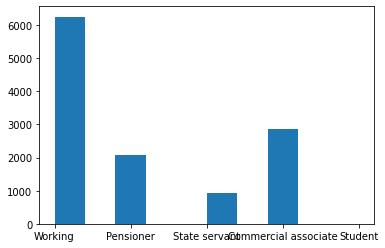

In [ ]:
print(df.income_type.value_counts())
plt.hist(df.income_type)
plt.xticks(rotation=45)
plt.show()

Secondary / secondary special    8295
Higher education                 3190
Incomplete higher                 472
Lower secondary                   132
Academic degree                    10
Name: edu_type, dtype: int64


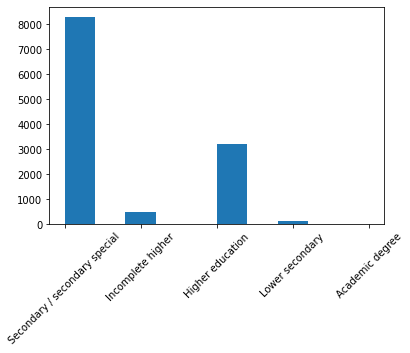

In [ ]:
print(df.edu_type.value_counts())
plt.hist(df.edu_type)
plt.xticks(rotation=45)
plt.show()
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



In [ ]:
df.groupby(['edu_type'])['income_total'].mean().reset_index()

,edu_type,income_total
0,Academic degree,249750.000000
1,Higher education,220317.937618
2,Incomplete higher,204108.368644
3,Lower secondary,142329.545455
4,Secondary / secondary special,168527.268716


Married                 8219
Single / not married    1660
Civil marriage           996
Separated                716
Widow                    508
Name: family_type, dtype: int64


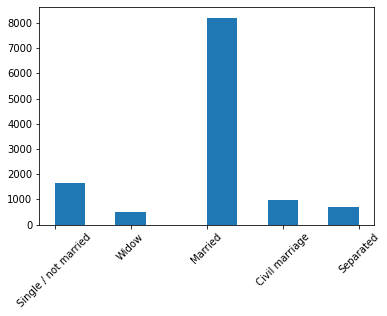

In [ ]:
print(df.family_type.value_counts())
plt.hist(df.family_type)
plt.xticks(rotation=45)
plt.show()

House / apartment      10798
With parents             578
Municipal apartment      390
Rented apartment         188
Office apartment          97
Co-op apartment           48
Name: house_type, dtype: int64


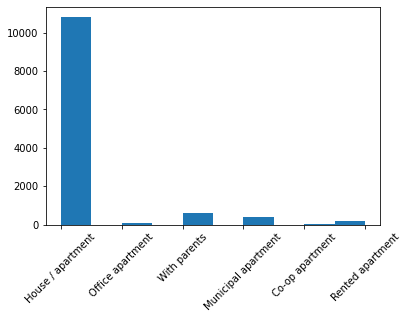

In [ ]:
print(df.house_type.value_counts())
plt.hist(df.house_type)
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.occyp_type.value_counts(dropna=False))

NaN                      3666
Laborers                 2158
Sales staff              1182
Core staff               1134
Managers                  989
Drivers                   759
High skill tech staff     457
Accountants               406
Medicine staff            371
Cooking staff             227
Security staff            209
Cleaning staff            191
Private service staff     105
Low-skill Laborers         64
Waiters/barmen staff       54
Secretaries                54
HR staff                   27
IT staff                   25
Realty agents              21
Name: occyp_type, dtype: int64


In [ ]:
df.FLAG_MOBIL.value_counts()

1    12099
Name: FLAG_MOBIL, dtype: int64

- FLAG_MOBIL 모든 값이 1이므로 제거



In [ ]:
df.drop(['FLAG_MOBIL'], axis=1, inplace=True)
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card
8076,8076,F,N,Y,0,101250.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10179,-1813,0,1,0,Sales staff,1.0,-7.0,1.0,1
4803,4803,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22059,365243,0,1,0,NaN,1.0,-30.0,0.0,4
12317,12317,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-22059,365243,0,1,0,NaN,1.0,-2.0,1.0,2
14668,14668,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10396,-564,0,0,1,IT staff,2.0,-5.0,0.0,2
8190,8190,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-10396,-564,0,0,1,IT staff,2.0,-1.0,1.0,1


# 2. 전처리

### 결측치

In [ ]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3666
family_size         0
begin_month         0
credit              0
num_card            0
dtype: int64

In [ ]:
df[df['income_type']=='Pensioner']['occyp_type'].value_counts(dropna=False)

NaN               2055
Laborers             3
Core staff           2
Managers             1
Drivers              1
Accountants          1
Medicine staff       1
Name: occyp_type, dtype: int64

- income_type이 Pensioner인 행의 occyp_type은 대부분 결측치  
=> 결측 중 income_type이 Pensioner인 사람은 'Pensioner'라는 새로운 occyp_type 지정

In [ ]:
df['occyp_type'] = np.where(((pd.notnull(df['occyp_type'])==False) & (df['income_type']=='Pensioner')), 'Pensioner', df['occyp_type'])

In [ ]:
df.occyp_type.isnull().sum()

1611

- 남은 3731개의 결측치 처리는 추후 진행

In [ ]:
df[df['income_type']=='Pensioner']['DAYS_EMPLOYED'].value_counts()

 365243    2053
-3680         1
-5521         1
-1325         1
-673          1
-443          1
-2208         1
-2745         1
-672          1
-620          1
-586          1
-198          1
Name: DAYS_EMPLOYED, dtype: int64

## 이상치 처리

### 파생 변수

In [ ]:
# 음수값 절댓값 취해서 양수로 변환

feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df[feat]=np.abs(df[feat])

In [ ]:
# 이해하기 쉽게 나이와 근속년차 변수 생성

df['Age'] = df['DAYS_BIRTH']//365
df['career_year'] = np.ceil(df['DAYS_EMPLOYED']/365)
df['career_start_age'] = df['Age'] - df['career_year']
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card,Age,career_year,career_start_age
8076,8076,F,N,Y,0,101250.0,Working,Secondary / secondary special,Single / not married,House / apartment,10179,1813,0,1,0,Sales staff,1.0,7.0,1.0,1,27,5.0,22.0
4803,4803,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,22059,365243,0,1,0,Pensioner,1.0,30.0,0.0,4,60,1001.0,-941.0
12317,12317,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,22059,365243,0,1,0,Pensioner,1.0,2.0,1.0,2,60,1001.0,-941.0
14668,14668,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,10396,564,0,0,1,IT staff,2.0,5.0,0.0,2,28,2.0,26.0
8190,8190,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,10396,564,0,0,1,IT staff,2.0,1.0,1.0,1,28,2.0,26.0


In [ ]:
# ability: 소득 / (살아온 일 수 + 근무일 수) or 소득/근무일 수
df['ability'] = df['income_total'] / (df['DAYS_BIRTH'] + df['DAYS_EMPLOYED'])
df['ability2'] = df['income_total'] / df['DAYS_EMPLOYED']

# income_unit: 소득 / 가족 수
df['income_unit'] = df['income_total']/df['family_size'] # 가족 수 이상치 추후 처리

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,num_card,Age,career_year,career_start_age,ability,ability2,income_unit
8076,8076,F,N,Y,0,101250.0,Working,Secondary / secondary special,Single / not married,House / apartment,10179,1813,0,1,0,Sales staff,1.0,7.0,1.0,1,27,5.0,22.0,8.443129,55.846663,101250.0
4803,4803,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,22059,365243,0,1,0,Pensioner,1.0,30.0,0.0,4,60,1001.0,-941.0,0.261424,0.277213,101250.0
12317,12317,F,N,Y,0,101250.0,Pensioner,Secondary / secondary special,Widow,House / apartment,22059,365243,0,1,0,Pensioner,1.0,2.0,1.0,2,60,1001.0,-941.0,0.261424,0.277213,101250.0
14668,14668,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,10396,564,0,0,1,IT staff,2.0,5.0,0.0,2,28,2.0,26.0,9.443431,183.510638,51750.0
8190,8190,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,10396,564,0,0,1,IT staff,2.0,1.0,1.0,1,28,2.0,26.0,9.443431,183.510638,51750.0


- income_type이 Pensioner인 행의 DAYS_EMPLOYED 값이 대부분 이상치(365243)로 설정되어 있는 문제  
=> 다른 사람들의 평균으로 대체

In [ ]:
# 연금받는 사람들 나이의 중앙값
a = df[df['income_type']=='Pensioner']['Age'].median()

In [ ]:
# 연금받는 사람들이 아닌 사람들 업무 시작 나이의 중앙값
b = df[df['income_type']!='Pensioner']['career_start_age'].median()

=> 연금받는 사람들의 근속년수를 (a-b)로 대체

In [ ]:
df['career_year'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b), df['career_year'])

In [ ]:
# 이에 맞게 'DAYS_EMPLOYED'도 수정
df['DAYS_EMPLOYED'] = np.where(((df['income_type']=='Pensioner') & (df['DAYS_EMPLOYED']==365243)), (a-b)*365, df['DAYS_EMPLOYED'])

In [ ]:
df['career_start_age'] = df['Age'] - df['career_year']
df[df['income_type']=='Pensioner'][['DAYS_EMPLOYED', 'career_year', 'career_start_age']]

,DAYS_EMPLOYED,career_year,career_start_age
4803,10585.0,29.0,31.0
12317,10585.0,29.0,31.0
22083,10585.0,29.0,26.0
20605,10585.0,29.0,26.0
8544,10585.0,29.0,28.0
...,...,...,...
24147,10585.0,29.0,6.0
15878,10585.0,29.0,32.0
20752,10585.0,29.0,32.0
22437,10585.0,29.0,35.0


- occyp_type 변수를 income_total변수를 기준으로 categorizing하려하였으나 income_total변수와의 다중공선성 문제로 occyp_type 변수를 아예 삭제?  

In [ ]:
df.drop('occyp_type', axis=1, inplace=True)

In [ ]:
# df.to_csv("train_ppc.csv")

- widow의 gender가 M인 경우 -> 이상치로 고려하여 F로 바꿈

In [ ]:
df.loc[(df['family_type']=='Widow') & (df['gender']=='M'),'gender'] = 'F'

In [ ]:
### widow의 income_total 매우 낮은 인사이트 찾음 => 나중에 넣자

- 범주형 변수 -> 숫자 변환하기

In [ ]:
df['gender'] = df['gender'].apply(lambda x: 0 if x=='M' else 1)
df['car'] = df['car'].apply(lambda x: 1 if x=='Y' else 0)
df['reality'] = df['reality'].apply(lambda x: 1 if x=='Y' else 0)

In [ ]:
df2 = df.copy()

In [ ]:
# LabelEncoder
features = ['income_type', 'edu_type', 'family_type', 'house_type']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2[features] = df2[features].apply(le.fit_transform)

In [ ]:
df2.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,num_card,Age,career_year,career_start_age,ability,ability2,income_unit
8076,8076,1,0,1,0,101250.0,4,4,3,1,10179,1813.0,0,1,0,1.0,7.0,1.0,1,27,5.0,22.0,8.443129,55.846663,101250.0
4803,4803,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,30.0,0.0,4,60,29.0,31.0,0.261424,0.277213,101250.0
12317,12317,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,2.0,1.0,2,60,29.0,31.0,0.261424,0.277213,101250.0
14668,14668,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,5.0,0.0,2,28,2.0,26.0,9.443431,183.510638,51750.0
8190,8190,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,1.0,1.0,1,28,2.0,26.0,9.443431,183.510638,51750.0


In [ ]:
df2.to_csv("data/train_ppc3.csv")

### (불균형 데이터 -> 오버샘플링)

# 우리의 목표는 신용도가 안 좋은 사람을 골라내는 작업  
(더군다나 0,1인 그룹이 2인 그룹보다 상대적으로 매우 적음)  
=> credit이 1인 사람을 모두 0으로 바꿔서 합쳐버려  
=> 다중분류를 이진분류 작업으로 바꿔버려

In [ ]:
df2['credit'] = df2['credit'].apply(lambda x: 0 if x==1 else x)
df2['credit'].value_counts()

2.0    6974
0.0    5125
Name: credit, dtype: int64

<!-- - 신용도가 높은 사람들의 가입 기간 고려하여 비교하기 -->

# 모델링
## ANN - 이진 분류

In [ ]:
df2.shape

(12099, 26)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler

X = df2.drop(columns=['index', 'credit'], axis=1)
y = df2['credit']
y = y.apply(lambda x: 1 if x==2 else x)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(9074, 24) (3025, 24)
(9074,) (3025,)


In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6400      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 39,425
Trainable params: 39,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=False)
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=10, 
                    validation_split=0.1, 
                    epochs=500, 
                    callbacks=[es, mc])

Epoch 1/500
817/817 [==============================] - 7s 4ms/step - loss: 0.6615 - accuracy: 0.6072 - val_loss: 0.6479 - val_accuracy: 0.6244
Epoch 2/500
817/817 [==============================] - 3s 4ms/step - loss: 0.6335 - accuracy: 0.6447 - val_loss: 0.6308 - val_accuracy: 0.6531
Epoch 3/500
817/817 [==============================] - 3s 4ms/step - loss: 0.6235 - accuracy: 0.6534 - val_loss: 0.6368 - val_accuracy: 0.6278
Epoch 4/500
817/817 [==============================] - 3s 4ms/step - loss: 0.6136 - accuracy: 0.6631 - val_loss: 0.6285 - val_accuracy: 0.6443
Epoch 5/500
817/817 [==============================] - 3s 4ms/step - loss: 0.6068 - accuracy: 0.6658 - val_loss: 0.6270 - val_accuracy: 0.6498
Epoch 6/500
817/817 [==============================] - 3s 4ms/step - loss: 0.5995 - accuracy: 0.6703 - val_loss: 0.6456 - val_accuracy: 0.6322
Epoch 7/500
817/817 [==============================] - 3s 4ms/step - loss: 0.5924 - accuracy: 0.6755 - val_loss: 0.6412 - val_accuracy: 0.6289

(0.0, 0.6789003074169159)

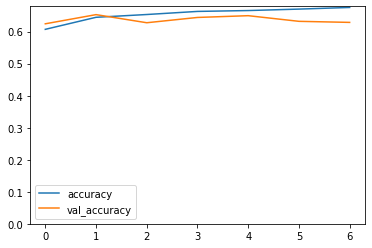

In [ ]:
df_history = pd.DataFrame(history.history)
df_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df_h.plot()
plt.ylim(0,)

min_val_loss: 0.5924156904220581


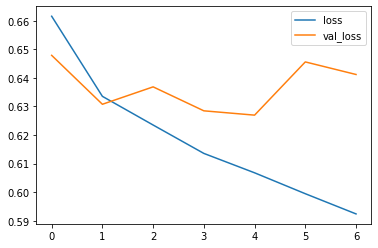

In [ ]:
df_h2 = df_history.loc[:, ['loss', 'val_loss']]
df_h2.plot()
print(f"min_val_loss: {df_h2['loss'].min()}")

In [ ]:
score = model.evaluate(X_test, y_test)
print(f'test loss: {score[0]}')
print(f'test accuracy: {score[1]}')

95/95 [==============================] - 0s 3ms/step - loss: 0.6352 - accuracy: 0.6393
test loss: 0.6351694464683533
test accuracy: 0.6393388509750366


In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400,random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.666753	valid_0's binary_logloss: 0.666753
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.654303	valid_0's binary_logloss: 0.654303
[3]	valid_0's binary_logloss: 0.644801	valid_0's binary_logloss: 0.644801
[4]	valid_0's binary_logloss: 0.636433	valid_0's binary_logloss: 0.636433
[5]	valid_0's binary_logloss: 0.629471	valid_0's binary_logloss: 0.629471
[6]	valid_0's binary_logloss: 0.623583	valid_0's binary_logloss: 0.623583
[7]	valid_0's binary_logloss: 0.619047	valid_0's binary_logloss: 0.619047
[8]	valid_0's binary_logloss: 0.615313	valid_0's binary_logloss: 0.615313
[9]	valid_0's binary_logloss: 0.611597	valid_0's binary_logloss: 0.611597
[10]	valid_0's binary_logloss: 0.609024	valid_0's binary_logloss: 0.609024
[11]	valid_0's binary_logloss: 0.606619	valid_0's binary_logloss: 0.606619
[12]	valid_0's binary_logloss: 0.603966	valid_0's binary_logloss: 0.603966
[13]	valid_0's binary_logloss: 0.602162	valid_

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[ 386  900]
 [ 109 1630]]

정확도: 0.6664
정밀도: 0.6443
재현율: 0.9373
F1: 0.7636
AUC: 0.6187


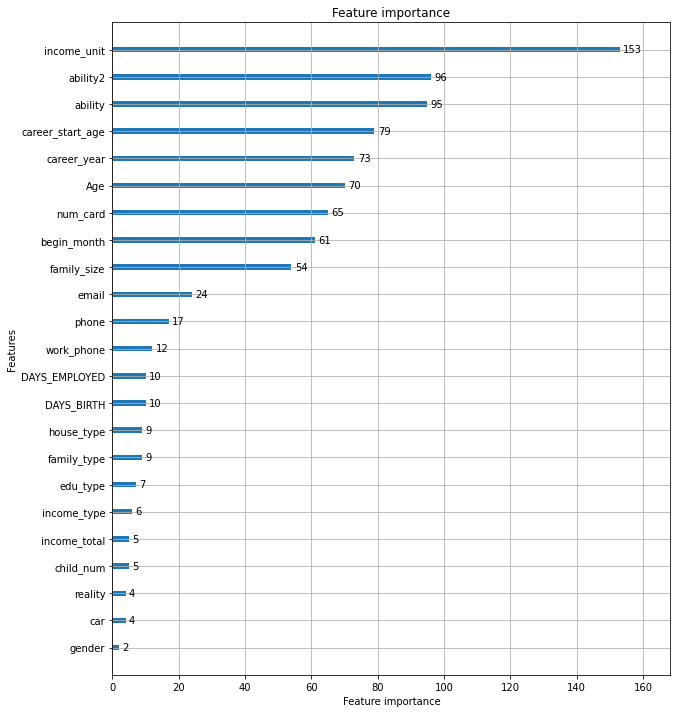

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax).set_yticklabels(X.columns)
plt.show()

In [ ]:
X.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,num_card,Age,career_year,career_start_age,ability,ability2,income_unit
8076,1,0,1,0,101250.0,4,4,3,1,10179,1813.0,0,1,0,1.0,7.0,1,27,5.0,22.0,8.443129,55.846663,101250.0
4803,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,30.0,4,60,29.0,31.0,0.261424,0.277213,101250.0
12317,1,0,1,0,101250.0,1,4,4,1,22059,10585.0,0,1,0,1.0,2.0,2,60,29.0,31.0,0.261424,0.277213,101250.0
14668,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,5.0,2,28,2.0,26.0,9.443431,183.510638,51750.0
8190,1,0,1,0,103500.0,4,4,1,1,10396,564.0,0,0,1,2.0,1.0,1,28,2.0,26.0,9.443431,183.510638,51750.0


In [ ]:
#제일 높은 feature importance :begin month

# Label 바꾸지 않은 데이터 (0,1,2)

In [ ]:
df3 =df2.copy()

In [ ]:
df3.columns()

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit', 'num_card', 'Age', 'career_year',
       'career_start_age', 'ability', 'ability2', 'income_unit'],
      dtype='object')

In [ ]:
df3.shape

(12099, 26)

In [ ]:
df3.corr()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,num_card,Age,career_year,career_start_age,ability,ability2,income_unit,grp_age
index,1.000000,-0.009583,0.012956,0.005486,0.004800,0.019307,0.016365,-0.001096,0.013700,0.003999,-0.001829,-0.006098,-0.006275,-0.009149,0.011679,-0.003527,0.004708,-0.003690,0.000822,-0.002116,-0.006015,0.003890,0.014912,0.012140,0.017887,0.001423
gender,-0.009583,1.000000,-0.360342,0.055910,-0.052512,-0.199097,-0.095701,-0.012567,0.090282,-0.063134,0.187253,0.202400,-0.061405,0.031415,-0.005581,-0.084112,0.006896,0.000659,0.035643,0.187049,0.202410,0.016681,-0.283376,-0.116343,-0.082465,0.182459
car,0.012956,-0.360342,1.000000,-0.007843,0.087859,0.220338,0.047359,-0.097651,-0.126172,0.003464,-0.131697,-0.151181,0.029145,-0.009896,0.018231,0.138209,0.032748,0.003938,0.018001,-0.131217,-0.151170,-0.001653,0.246699,0.095146,0.064940,-0.127891
reality,0.005486,0.055910,-0.007843,1.000000,0.002024,0.038093,-0.043872,0.006380,0.007351,-0.182279,0.138295,0.080949,-0.190153,-0.062111,0.062983,0.001628,0.001115,-0.002629,0.010463,0.137961,0.080458,0.087675,-0.054464,-0.022790,0.030721,0.129685
child_num,0.004800,-0.052512,0.087859,0.002024,1.000000,0.026223,0.106204,-0.036283,-0.153313,0.021418,-0.318520,-0.212347,0.051414,-0.028144,0.011014,0.889919,-0.002524,-0.000814,0.008199,-0.318241,-0.210959,-0.174471,0.168998,0.056435,-0.340873,-0.304203
income_total,0.019307,-0.199097,0.220338,0.038093,0.026223,1.000000,-0.073091,-0.232049,-0.016296,-0.004490,-0.059721,-0.120777,-0.034946,0.013752,0.087179,0.024119,0.015187,-0.003086,0.049676,-0.059389,-0.119632,0.055328,0.746919,0.250949,0.714088,-0.060122
income_type,0.016365,-0.095701,0.047359,-0.043872,0.106204,-0.073091,1.000000,0.066113,-0.038948,0.036269,-0.215779,-0.278042,0.149799,-0.001898,-0.019300,0.100591,-0.012043,-0.011110,0.002610,-0.215871,-0.275105,0.026197,0.097318,0.026793,-0.094962,-0.205251
edu_type,-0.001096,-0.012567,-0.097651,0.006380,-0.036283,-0.232049,0.066113,1.000000,0.006901,-0.041085,0.158285,0.106196,-0.010339,-0.040777,-0.096929,-0.029535,-0.006004,0.022678,-0.017949,0.158370,0.105007,0.086797,-0.260246,-0.111234,-0.156282,0.152216
family_type,0.013700,0.090282,-0.126172,0.007351,-0.153313,-0.016296,-0.038948,0.006901,1.000000,0.023626,0.084406,0.088288,-0.058886,-0.008708,-0.003387,-0.537831,-0.028992,-0.005170,-0.012871,0.084281,0.087834,0.011204,-0.042939,-0.007422,0.464136,0.077040
house_type,0.003999,-0.063134,0.003464,-0.182279,0.021418,-0.004490,0.036269,-0.041085,0.023626,1.000000,-0.220386,-0.139066,0.032835,-0.028393,0.016100,-0.004599,-0.036803,-0.012340,-0.002891,-0.219736,-0.139063,-0.127692,0.124077,0.041650,0.013850,-0.210940


In [ ]:
#Age 변수와 grp_age변수간의 상관관계가 0.97로 매우 높아 다중공선성에 의해 정확도가 낮아질 거라 예상 했지만 각각을 제외하고 돌려본 결과보다 두개의 값이 다 있을때의 정확도가 더 높게 측정이됌

In [ ]:
df3.drop(['Age'],inplace=True,axis=1)

In [ ]:
# LabelEncoder
features = ['income_type', 'edu_type', 'family_type', 'house_type']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3[features] = df3[features].apply(le.fit_transform)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import StandardScaler

X = df3.drop(columns=['index', 'credit'], axis=1)
y = df3['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=False)
mc = ModelCheckpoint(filepath='best_model2.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size=10, 
                    validation_split=0.1, 
                    epochs=300, 
                    callbacks=[es, mc])

Epoch 1/300
817/817 [==============================] - 4s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/300
817/817 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/300
817/817 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/300
817/817 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/300
817/817 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/300
817/817 [==============================] - 3s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/300
817/817 [=========================

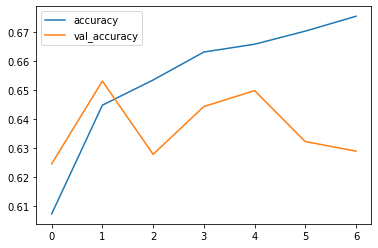

In [ ]:
df3_history = pd.DataFrame(history.history)
df3_h = df_history.loc[:, ['accuracy', 'val_accuracy']]
df3_h.plot()

## Catboost

In [ ]:
pip install catboost

     |████████████████████████████████| 76.3 MB 29 kB/s 


In [ ]:
import catboost as cb
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df3.drop(columns=['index', 'credit'], axis=1)
y = df3['credit']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train_dataset = cb.Pool(X_train,y_train)
test_dataset = cb.Pool(X_test,y_test)

In [ ]:
model = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy',random_state=0)

In [ ]:
grid = {'depth': [4, 6, 10],
'l2_leaf_reg': [1, 3, 5,],
'iterations': [50, 100, 150]}

In [ ]:
#learning rate를 catboost 자체적으로 조정하는게 제일 정확도가 높았음

In [ ]:
model.grid_search(grid,train_dataset)

0:	learn: 0.6619369	test: 0.6484848	best: 0.6484848 (0)	total: 4.68ms	remaining: 229ms
1:	learn: 0.6619369	test: 0.6484848	best: 0.6484848 (0)	total: 11.9ms	remaining: 285ms
2:	learn: 0.6619369	test: 0.6484848	best: 0.6484848 (0)	total: 19.7ms	remaining: 309ms
3:	learn: 0.6619369	test: 0.6484848	best: 0.6484848 (0)	total: 24.1ms	remaining: 278ms
4:	learn: 0.6668963	test: 0.6523416	best: 0.6523416 (4)	total: 28.3ms	remaining: 255ms
5:	learn: 0.6670340	test: 0.6512397	best: 0.6523416 (4)	total: 32.8ms	remaining: 241ms
6:	learn: 0.6685494	test: 0.6550964	best: 0.6550964 (6)	total: 37.2ms	remaining: 229ms
7:	learn: 0.6685494	test: 0.6550964	best: 0.6550964 (6)	total: 41.6ms	remaining: 219ms
8:	learn: 0.6677228	test: 0.6539945	best: 0.6550964 (6)	total: 46ms	remaining: 210ms
9:	learn: 0.6673095	test: 0.6523416	best: 0.6550964 (6)	total: 50.3ms	remaining: 201ms
10:	learn: 0.6671718	test: 0.6506887	best: 0.6550964 (6)	total: 54.8ms	remaining: 194ms
11:	learn: 0.6685494	test: 0.6545455	best: 0

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49],
            

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.89      0.26      0.40      1286
         2.0       0.64      0.98      0.77      1739

    accuracy                           0.67      3025
   macro avg       0.76      0.62      0.59      3025
weighted avg       0.75      0.67      0.61      3025



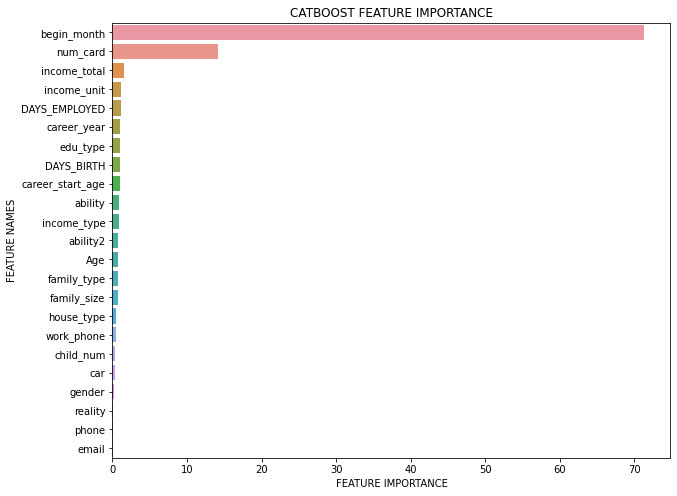

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(model.get_feature_importance(),X.columns,'CATBOOST')

In [ ]:
# Catboost 모델 정확도
model.score(X_test, y_test)

0.6704132231404959

In [ ]:
# 디폴트 하이퍼파라미터
model2 = cb.CatBoostClassifier(loss_function='MultiClass', eval_metric='Accuracy')
model2.fit(X_train, y_train,
           use_best_model=True, early_stopping_rounds=100, verbose=100)

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.088546
0:	learn: 0.6648667	total: 8.47ms	remaining: 8.46s
100:	learn: 0.6820586	total: 817ms	remaining: 7.27s
200:	learn: 0.7040996	total: 1.62s	remaining: 6.44s
300:	learn: 0.7244875	total: 2.41s	remaining: 5.61s
400:	learn: 0.7454265	total: 3.22s	remaining: 4.81s
500:	learn: 0.7639409	total: 4.03s	remaining: 4.01s
600:	learn: 0.7799207	total: 4.83s	remaining: 3.21s
700:	learn: 0.7966718	total: 5.64s	remaining: 2.4s
800:	learn: 0.8111087	total: 6.44s	remaining: 1.6s
900:	learn: 0.8273088	total: 7.28s	remaining: 800ms
999:	learn: 0.8376681	total: 8.08s	remaining: 0us


In [ ]:
from sklearn.metrics import classification_report

pred = model2.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.37      0.45      1286
         2.0       0.63      0.81      0.71      1739

    accuracy                           0.62      3025
   macro avg       0.61      0.59      0.58      3025
weighted avg       0.62      0.62      0.60      3025



In [ ]:
model2.score(X_test, y_test)

0.6175206611570248

## LGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm_wrapper = LGBMClassifier(n_estimators=400,random_state=0)

In [ ]:
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, 
                 eval_metric="multi_logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.666753	valid_0's binary_logloss: 0.666753
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.654303	valid_0's binary_logloss: 0.654303
[3]	valid_0's binary_logloss: 0.644801	valid_0's binary_logloss: 0.644801
[4]	valid_0's binary_logloss: 0.636433	valid_0's binary_logloss: 0.636433
[5]	valid_0's binary_logloss: 0.629471	valid_0's binary_logloss: 0.629471
[6]	valid_0's binary_logloss: 0.623583	valid_0's binary_logloss: 0.623583
[7]	valid_0's binary_logloss: 0.619047	valid_0's binary_logloss: 0.619047
[8]	valid_0's binary_logloss: 0.615313	valid_0's binary_logloss: 0.615313
[9]	valid_0's binary_logloss: 0.611597	valid_0's binary_logloss: 0.611597
[10]	valid_0's binary_logloss: 0.609024	valid_0's binary_logloss: 0.609024
[11]	valid_0's binary_logloss: 0.606619	valid_0's binary_logloss: 0.606619
[12]	valid_0's binary_logloss: 0.603966	valid_0's binary_logloss: 0.603966
[13]	valid_0's binary_logloss: 0.602162	valid_

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.78      0.30      0.43      1286
         2.0       0.64      0.94      0.76      1739

    accuracy                           0.67      3025
   macro avg       0.71      0.62      0.60      3025
weighted avg       0.70      0.67      0.62      3025



In [ ]:
# LightGbm Classifier 모델 정확도
lgbm_wrapper.score(X_test, y_test)

0.6664462809917355

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax).set_yticklabels(X.columns)
plt.show()